In [59]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter
INPUT_DIR = 'D:/tens/kraggle/whale/train/'

PATH = r"D:\tens\kraggle\whale\train.csv"
train_df = pd.read_csv(PATH)

In [33]:
train_df.describe()

,Image,Id
count,9850,9850
unique,9850,4251
top,72046206.jpg,new_whale
freq,1,810


In [34]:
train_df.head()

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3


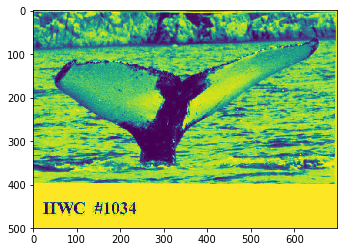

In [45]:
fig = plt.figure()
img = plt.imread(INPUT_DIR+train_df.Image[0])
plt.imshow(img)
plt.show()

In [48]:
num_categories = len(train_df.Id.unique())
num_img = len(train_df.Id)

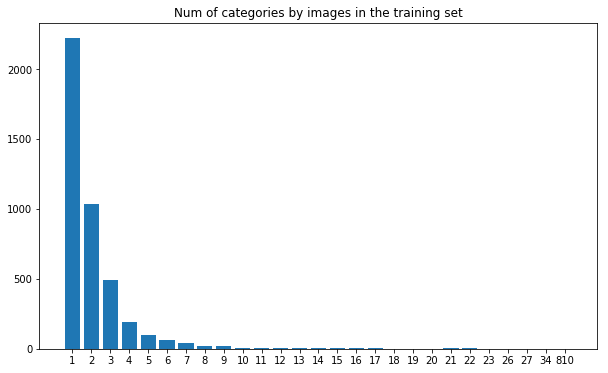

In [66]:
size_buckets = Counter(train_df.Id.value_counts())
plt.figure(figsize=(10, 6))

plt.bar(range(len(size_buckets)), list(size_buckets.values())[::-1], align='center')
plt.xticks(range(len(size_buckets)), list(size_buckets.keys())[::-1])
plt.title("Num of categories by images in the training set")

plt.show()

In [67]:
train_df['Id'].value_counts().head(3)

new_whale    810
w_1287fbc     34
w_98baff9     27
Name: Id, dtype: int64

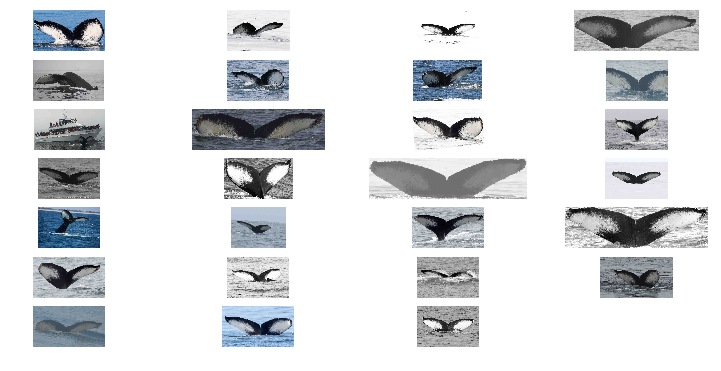

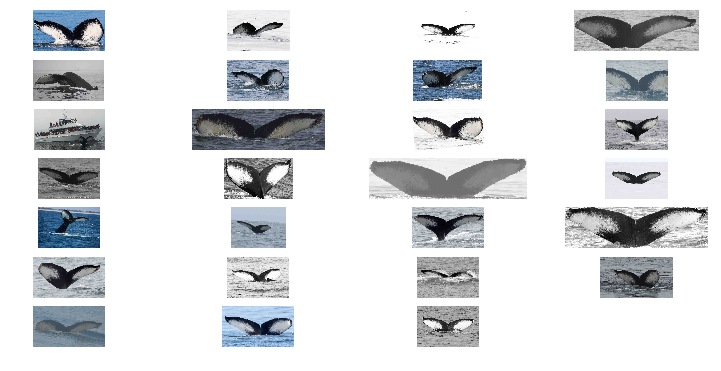

In [77]:
w_98baff9 = train_df[train_df['Id'] == 'w_98baff9']
plot_images_for_filenames(list(w_98baff9['Image']), None, rows=9)
plt.show()

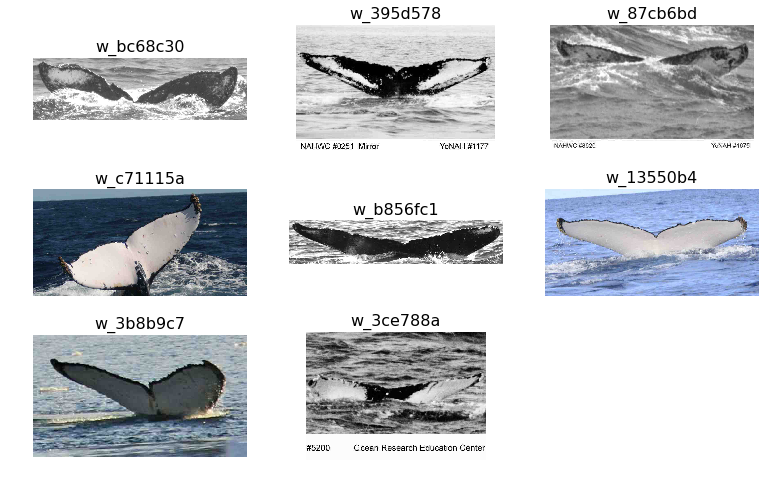

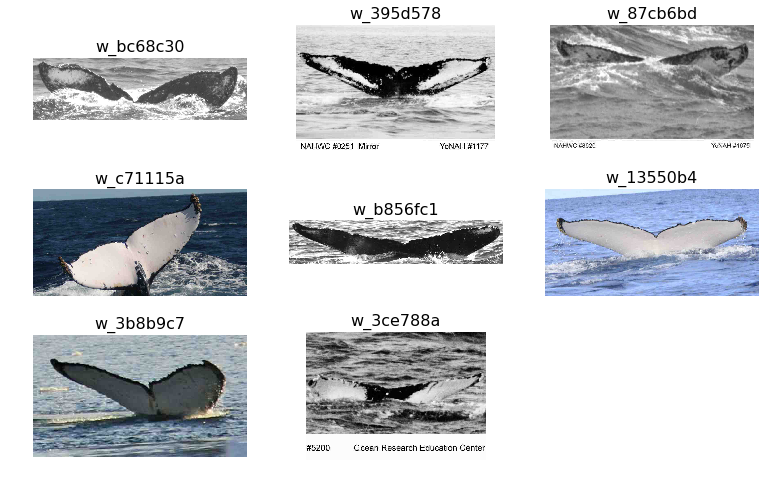

In [79]:
one_image_ids = train_df['Id'].value_counts().tail(8).keys()
one_image_filenames = []
labels = []
for i in one_image_ids:
    one_image_filenames.extend(list(train_df[train_df['Id'] == i]['Image']))
    labels.append(i)
    
plot_images_for_filenames(one_image_filenames, labels, rows=3)
plt.show()

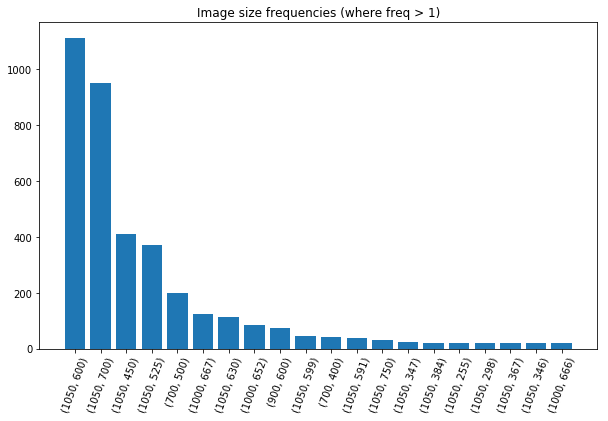

In [83]:
img_sizes = Counter([Image.open(f'{INPUT_DIR}{i}').size for i in train_df['Image']])

size, freq = zip(*Counter({i: v for i, v in img_sizes.items() if v > 1}).most_common(20))

plt.figure(figsize=(10, 6))

plt.bar(range(len(freq)), list(freq), align='center')
plt.xticks(range(len(size)), list(size), rotation=70)
plt.title("Image size frequencies (where freq > 1)")

plt.show()

In [85]:
from keras.preprocessing.image import (
    random_rotation, random_shift, random_shear, random_zoom,
    random_channel_shift, transform_matrix_offset_center, img_to_array)
img = Image.open(f'{INPUT_DIR}ff38054f.jpg')

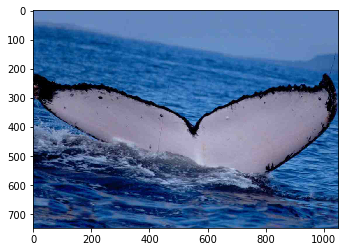

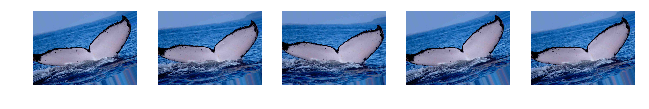

In [110]:
img_arr = img_to_array(img)
plt.imshow(img)
imgs = [
    random_rotation(img_arr, 30, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest') * 255
    for _ in range(5)]
img_max = np.array(imgs).max()
imgs = imgs/img_max
plot_images(imgs, None, rows=1)
plt.show()

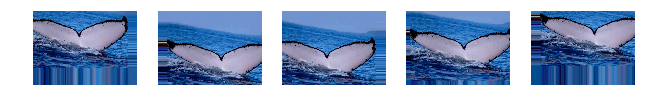

In [111]:
imgs = [
    random_shift(img_arr, wrg=0.1, hrg=0.3, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest') * 255
    for _ in range(5)]

img_max = np.array(imgs).max()
imgs = imgs/img_max
plot_images(imgs, None, rows=1)
plt.show()

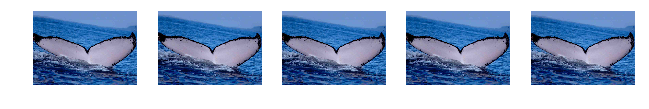

In [112]:
imgs = [
    random_shear(img_arr, intensity=0.4, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest') * 255
    for _ in range(5)]
img_max = np.array(imgs).max()
imgs = imgs/img_max
plot_images(imgs, None, rows=1)
plt.show()

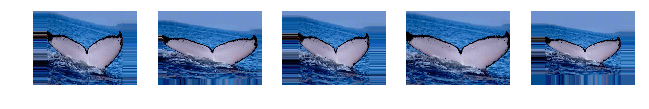

In [113]:
imgs = [
    random_zoom(img_arr, zoom_range=(1.5, 0.7), row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest') * 255
    for _ in range(5)]
img_max = np.array(imgs).max()
imgs = imgs/img_max
plot_images(imgs, None, rows=1)
plt.show()

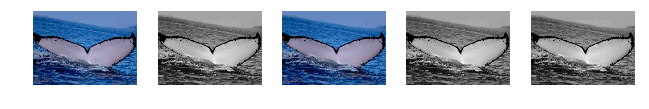

In [94]:
import random

def random_greyscale(img, p):
    if random.random() < p:
        return np.dot(img[...,:3], [0.299, 0.587, 0.114])
    
    return img

imgs = [
    random_greyscale(img_arr, 0.5) * 255
    for _ in range(5)]

plot_images(imgs, None, rows=1)
plt.show()